## Hands-on Exercise:  Mall Customers
 
Source:
 https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

`Background`: Suppose you are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

`Problem Statement`: You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.



In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Data Load In and Preprocess
Load data from the link: https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/Mall_Customers.csv. The analysis is based on three columns: "Age", "Annual Income (k$)" and "Spending Score (1-100)" of the data frame. 


In [ ]:
url = 'https://raw.githubusercontent.com/XiaomengYan/MachineLearning_dataset/main/Mall_Customers.csv'
dataset = pd.read_csv(url)
dataset.head(10) #Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
X_market = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_market.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### 2. K-Means


Perform a K-Means algorithm towards the data frame (consisting of three columns mentioned above) and interpret the clustering results. 


#### 2.1 Select the parameter $K$

To determine the best number of clusters parameter $K$, we will use grid search and select the parameter $K$ based on two metrics described below: 
1. ELBOW method : ELBOW  method looks at the total within-cluster sum of squares (WSS) as a function of number of clusters. The location of a knee in the plot is usually considered as an indicator of the appropriate number of clusters because it means that adding another cluster does not improve much better the partition. 

2. Sihouette method: The Sihouette method measures the quality of a clustering and determine how well each point lies within ites cluster. Its value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 


In [ ]:
from sklearn.cluster import KMeans
#We assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_market)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_market, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

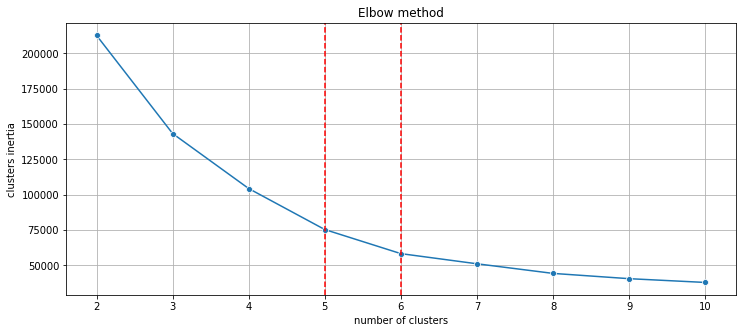

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
## ELBOW: It is the sum of squared distances of samples to their closest cluster center.
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

There is no clear "elbow" visible. A choice of 5 or 6 clusters seems to be fair. Let's see the Silhouette score.

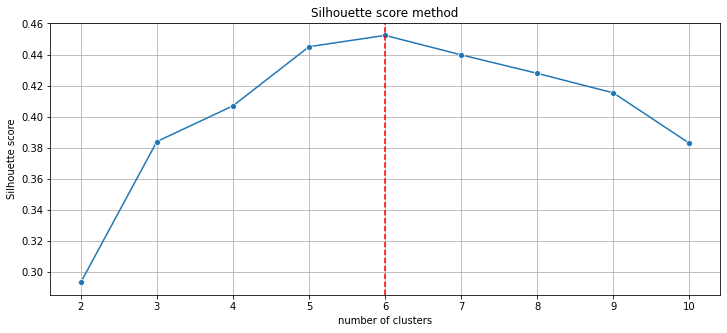

In [ ]:
# The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters. 
# This measure has a range of [-1, 1]
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

Silhouette score method indicates the best options would be respectively 6 or 5 clusters. Let's compare by fixing 5 for the analysis. 

#### 2.2 Perform K-Means and Visualize the Output

In [ ]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_market) # initialise and fit K-Means model

KM5_clustered = X_market.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

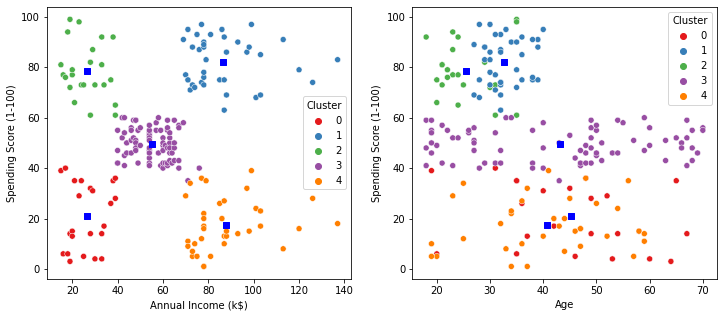

In [ ]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

K-Means algorithm generated the following 5 clusters:

* clients with low annual income and high spending score
* clients with medium annual income and medium spending score
* clients with high annual income and low spending score
* clients with high annual income and high spending score
* clients with low annual income and low spending score

There are no distinct groups is terms of customers age.

Below there is a 3D projection of 5 generated clusters. It is not very helpful in terms of a visualisation in a static mode but if you run the code in an interactive environment (e.g. Spyder) you can rotate it!

In [ ]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### 3. Gaussian Mixture Models

Fit a Gaussian Mixture Models todays the dataset with 5 clusters and print out the labels.  

In [ ]:
from sklearn.mixture import GaussianMixture
GMM_model = GaussianMixture(n_components=5, random_state=42).fit(X_market)
labels_gmm = GMM_model.predict(X_market)
labels_gmm

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

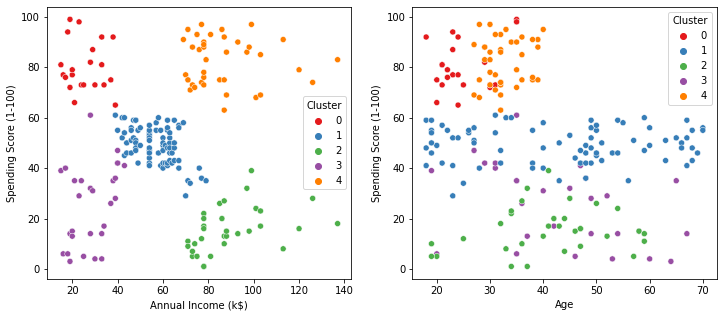

In [ ]:
GMM_clustered = X_market.copy()
GMM_clustered.loc[:,'Cluster'] = labels_gmm

fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=GMM_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=GMM_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

plt.show()

### 4. DBSCAN

In this section, a DBSCAN algorithm is utilized to cluster the Mall Customer dataset. In DBSCAN algorithm, there are two paramters `n_samples` and `eps`. We can use a heatmap to look at the configuration of eps and n_samples to produce our desired n_clusters and Silhouette score.

In [ ]:
from itertools import product
from sklearn.cluster import DBSCAN
from sklearn import metrics
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_market)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(metrics.silhouette_score(X_market, DBS_clustering.labels_))

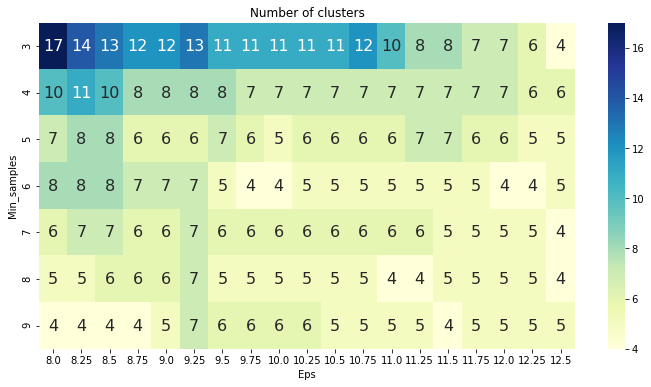

In [ ]:
import seaborn as sns
# A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

As the heatplot above shows, the number of clusters vary from 4 to 17.

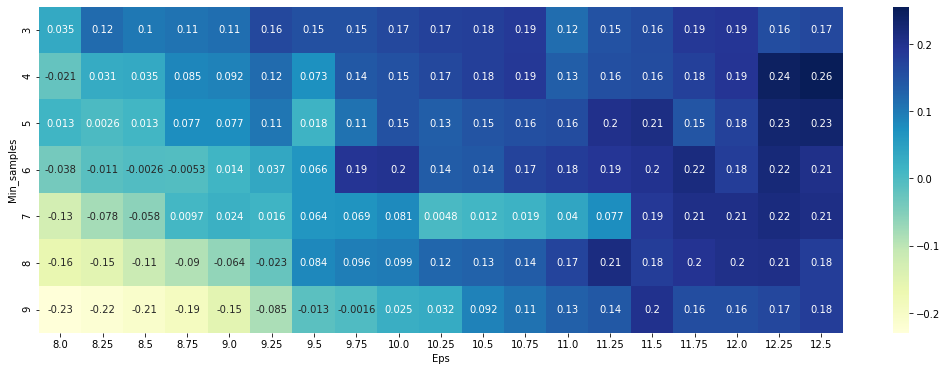

In [ ]:
# A heatplot below shows Silhouette score for the respective parameters combinations.
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.26 for eps=12.5 and min_samples=4.

### 5. Hierarchical Clustering

Perform hierarchical clustering and plot the dendrogram. 

In [ ]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
# Define a clustering model
# linkage has multiple options: 'ward', 'single', 'complete', 'average'
HC_model = AgglomerativeClustering(n_clusters=5, linkage ='ward')
pred_labels = HC_model.fit_predict(X_market) 
pred_labels


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

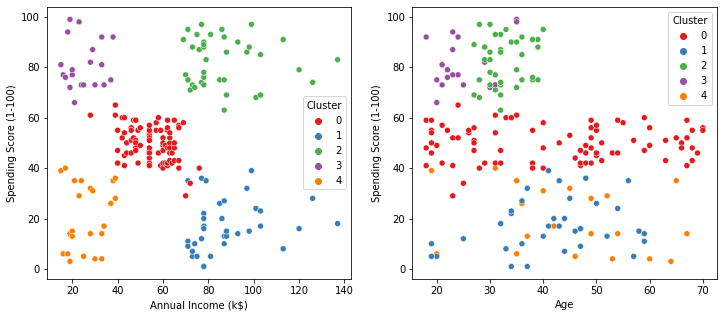

In [ ]:
HC_clustered = X_market.copy()
HC_clustered.loc[:,'Cluster'] = pred_labels

fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=HC_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=HC_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

Text(0, 0.5, 'Euclidean distances')

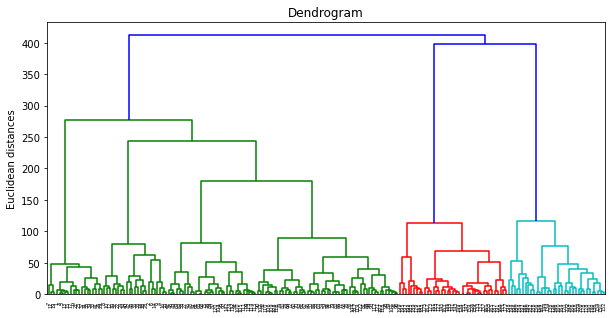

In [ ]:

plt.figure(figsize=(10,5))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X_market, method = "ward"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')